In [14]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy import interpolate

from astropy import constants as const
from astropy import units as u

import extinction

from plotting_spectra import *

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}Wavelength (Angstrom)

plt.rcParams.update(rc_params)

In [2]:
# Here the lightcurves are loaded
lightcurves_alercextns = pd.read_pickle('./data/lightcurves/lcs_transients_20240517.pkl')
lightcurves_alercextns

,oid,candid,rfid,mjd,fid,magpsf,sigmapsf
0,ZTF19abgpgyp,1515523874715015006,681120247.0,59269.523877,2,20.385720,0.211641
1,ZTF19abgpgyp,1499511354715015014,NaN,59253.511354,2,20.678400,0.258971
2,ZTF19abgpgyp,1502430264715015014,NaN,59256.430266,2,20.652500,0.269586
3,ZTF19abgpgyp,1510536184715015009,NaN,59264.536181,2,20.663600,0.299923
4,ZTF18abjswhy,1515520891415015005,685120214.0,59269.520891,2,16.079460,0.030863
...,...,...,...,...,...,...,...
4546324,ZTF19ablwbut,1508538592115015009,NaN,59262.538599,1,17.079200,0.062217
4546325,ZTF19ablwbut,1511512652115015011,NaN,59265.512651,1,17.125100,0.057529
4546326,ZTF19ablwbut,1513537042115015020,NaN,59267.537049,1,17.073800,0.073881
4546327,ZTF19ablwbut,1515495032115015010,NaN,59269.495035,1,17.232900,0.056399


In [3]:
# Load all spectra info, metadata and data.
spectra_metadata = pd.read_csv('wiserep_spectra_metadata.csv', low_memory=False)
spectra_data     = pd.read_pickle('spectra_ALeRCE20240704_x_wisrep_20240622.pkl')

In [ ]:
rare_supernova = spectra_metadata[spectra_metadata['IAU name'] == 'SN 2022qzr']
rare_supernova['Lambda-min']

In [ ]:
rare_supernova['Spec. units']

In [ ]:
lambda_data_max = np.array(spectra_data.lambda_data_max)
lambda_data_max = lambda_data_max[lambda_data_max > 10915.01]

In [ ]:
lambda_data_min = np.array(spectra_data.lambda_data_min)

# This mask have the values less than 1000 Angstrom
mask_lambda_min_indx = np.where(lambda_data_min <= 2500)[0]
#print(len(np.where(lambda_data_min >= 10915.01)[0]))
#spectra_data.iloc[mask_lambda_min_indx[1]].lambda_data_min
lambda_data_min.max()

In [ ]:
# usar el percentil 10 de los minimos
# Usar el percentil 90 de las maximos

spectra_data.lambda_data_min.quantile(0.1)

In [ ]:
mask = np.ones(len(spectra_data), dtype=bool)
mask[mask_lambda_min_indx] = False
masked_spectra_data = spectra_data.iloc[mask].reset_index(drop=True)
masked_spectra_data = masked_spectra_data[masked_spectra_data.lambda_data_min <= 5000]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Calcular los valores de la función gaussiana
x = np.linspace(masked_spectra_data.lambda_data_min.min(), masked_spectra_data.lambda_data_min.max(), 1000)
mu, sigma = masked_spectra_data.lambda_data_min.mean(), masked_spectra_data.lambda_data_min.std()

def gaussian(x, mu, sig):
    return 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

# Crear la figura de matplotlib
fig, ax = plt.subplots()

# Graficar el histograma de los datos originales con densidad normalizada
n, bins, patches = ax.hist(masked_spectra_data.lambda_data_min, bins=30, density=True, alpha=0.5, color='g')

# Normalizar el histograma
bin_centers = 0.5 * (bins[1:] + bins[:-1])
scale_factor = np.sum(n * np.diff(bins))
n_normalized = n / scale_factor

# Graficar la curva gaussiana normalizada
ax.plot(x, gaussian(x, mu, sigma) / scale_factor, 'r', linewidth=2)

# Etiquetas y título
#ax.set_ylabel("Densidad Normalizada")
ax.set_xlabel(r"Wavelength [$\AA$]")
#ax.set_title("Histograma y Curva Gaussiana Normalizados")

# Añadir el texto con mu y sigma
ax.text(0.05, 0.8, s='N = %d spectra'%(len(masked_spectra_data.lambda_data_min)) \
        +'\n'+r'$\mu$ = %.2f, $\sigma$ = %.2f' %(mu, sigma), transform=ax.transAxes)

# Mostrar la gráfica
plt.show()

In [ ]:
spectra_data_oid_non_nan = spectra_data.dropna()
condition = spectra_data_oid_non_nan.pivot_table(index='oid', aggfunc='size') >= 4
test = spectra_data_oid_non_nan[spectra_data_oid_non_nan.oid.isin(condition[condition].index)]
test[130:140]

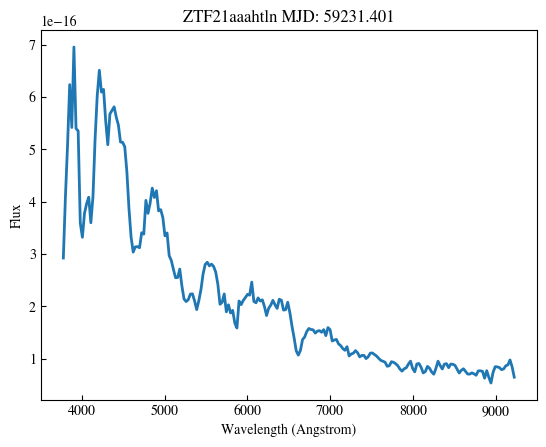

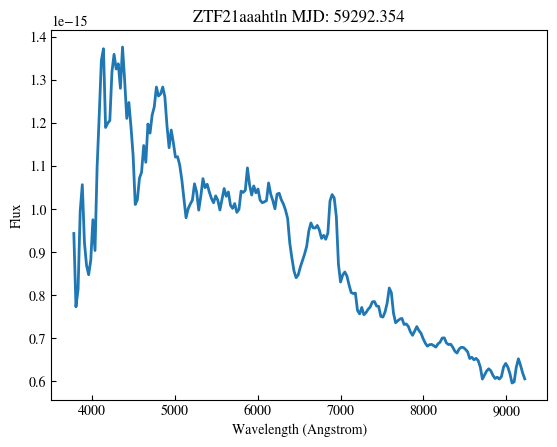

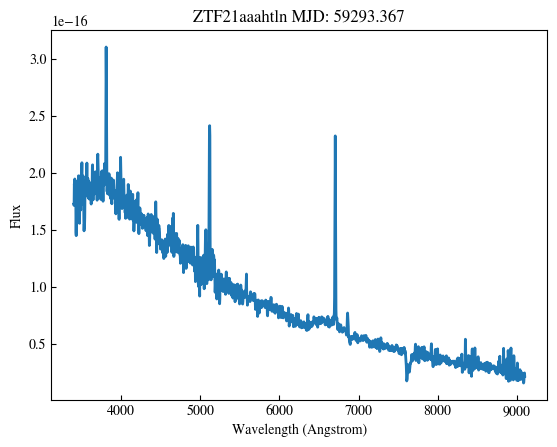

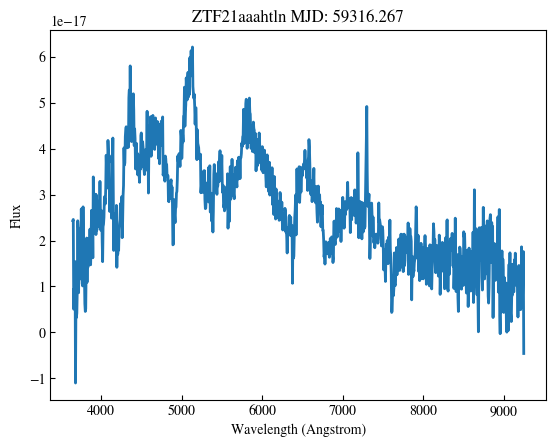

In [62]:
raw_spectra = pd.read_csv('./data/spectra_wiserep/SN2021gd.dat')
for group_name, group in raw_spectra.groupby('mjd'):
    fig, ax = plt.subplots()
    wave = group['lambda'].to_numpy()
    flux = group['flux_lambda'].to_numpy()
    ax.plot(wave, flux)
    ax.set_title(f'ZTF21aaahtln MJD: {group_name:.3f}')
    ax.set_xlabel('Wavelength (Angstrom)')
    ax.set_ylabel('Flux')

In [4]:
spectrum = spectra_data[spectra_data.snname == 'SN2021gd']
spectrum

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,e_flux_lambda
1049,ZTF21aaahtln,SN2021gd,ESO-NTT_EFOSC2-NTT,59316.267183,3206.34,10915.01,1838,3650.04834,9245.227457,"[1.05480832e-16, 1.085423635e-16, 9.320210285e...","[3.9546727511497587e-17, 4.135912612957995e-17..."
1050,ZTF21aaahtln,SN2021gd,P60_SEDM,59231.401400,3206.34,10915.01,1838,3776.70000,9223.300000,"[3.6409620225e-16, 4.615042e-16, 5.01596666666...","[1.2071214739422443e-16, 1.3097715175310187e-1..."
1051,ZTF21aaahtln,SN2021gd,P60_SEDM,59292.354051,3206.34,10915.01,1838,3776.70000,9223.300000,"[3.6409620225e-16, 4.615042e-16, 5.01596666666...","[1.2071214739422443e-16, 1.3097715175310187e-1..."
1052,ZTF21aaahtln,SN2021gd,UH88_SNIFS,59293.367245,3206.34,10915.01,1838,3402.86000,9099.860000,"[1.726054e-16, 1.71431e-16, 1.904138e-16, 1.86...","[1.0035616718011578e-17, 1.0350189959934039e-1..."


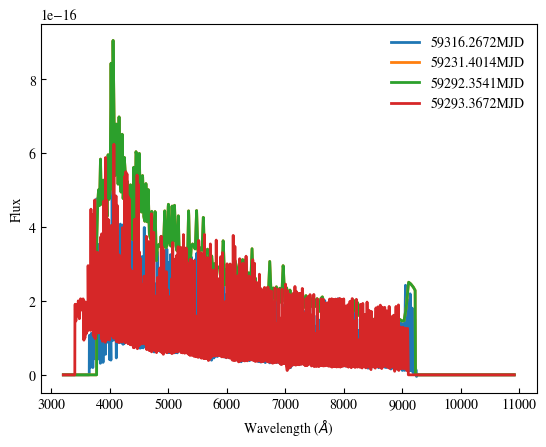

In [5]:
plot_spectra(spectrum, use_lambda_grid=True)

In [6]:
objective_ligtcurve = lightcurves_alercextns[lightcurves_alercextns.oid == spectrum.oid.unique()[0]]
objective_ligtcurve

,oid,candid,rfid,mjd,fid,magpsf,sigmapsf
801329,ZTF21aaahtln,1526278842415015007,712120224.0,59280.278843,2,20.341309,0.186969
801331,ZTF21aaahtln,1514322342415015003,NaN,59268.322349,2,20.076900,0.241257
1453992,ZTF21aaahtln,1465357172415015002,712120224.0,59219.357176,2,18.910633,0.085007
1453993,ZTF21aaahtln,1473447322415015006,NaN,59227.447326,1,18.446000,0.069452
1479586,ZTF21aaahtln,1475426062415015002,712120224.0,59229.426065,2,18.475786,0.077234
1541744,ZTF21aaahtln,1469381092415015004,712120124.0,59223.381100,1,18.514591,0.066307
1590063,ZTF21aaahtln,1463435302415015004,712120124.0,59217.435301,1,18.921488,0.094786
1598451,ZTF21aaahtln,1467405482415015002,NaN,59221.405486,2,18.709300,0.084887
1624705,ZTF21aaahtln,1475445522415015006,NaN,59229.445521,1,18.456300,0.071674
1646699,ZTF21aaahtln,1471447412415015015,NaN,59225.447419,1,18.484400,0.079614


In [7]:
wavelength_lsst = {'u':[3206.34, 4081.51], 'g':[3876.02, 5665.33], 'r':[5377.19, 7055.16],
                   'i':[6765.77, 8325.05], 'z':[8035.39, 9375.47], 'y':[9089.07, 10915.01]}

wavelength_ztf ={'g':[3676.00, 5613.82], 'r':[5497.60, 7394.40], 'i':[6870.97, 8964.61],}

ztf_sv_files  = [file for file in os.listdir('./data/') if 'Palomar' in file]
lsst_sv_files = [file for file in os.listdir('./data/') if 'LSST' in file]

ztf_sv_dict  = {file.split('.')[1]: np.loadtxt(fname=f'./data/{file}') for file in ztf_sv_files}
lsst_sv_dict = {file.split('.')[1]: np.loadtxt(fname=f'./data/{file}') for file in lsst_sv_files}

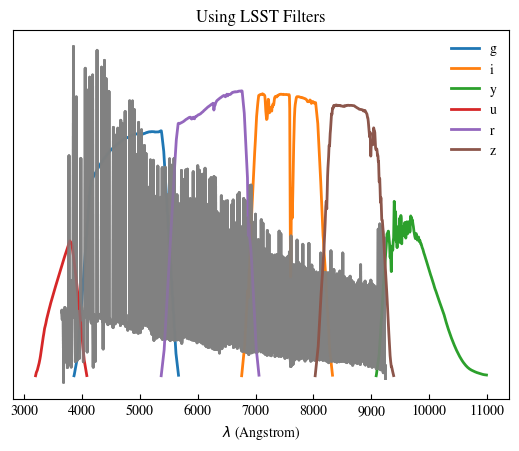

In [8]:
idx_spec = 0
fig, ax = plt.subplots()

for band, sv in lsst_sv_dict.items():
    x, y = zip(*lsst_sv_dict[band])
    x_spectrum = np.linspace(spectrum.iloc[idx_spec].lambda_data_min,spectrum.iloc[idx_spec].lambda_data_max,len(spectrum.iloc[idx_spec].flux_lambda))
    y_spectrum = np.array(spectrum.iloc[idx_spec].flux_lambda)*1e15
    ax.plot(x_spectrum, y_spectrum, alpha = 0.5, color='gray')
    ax.plot(x,y,label=f'{band}')
    ax.set_xlabel(r'$\lambda$ (Angstrom)')
    ax.set_yticklabels([])
    ax.set_yticks([])
    ax.set_title('Using LSST Filters')
ax.legend(frameon=False)

plt.show()

In [45]:
def obtain_magnitude_flux(spectrum:pd.DataFrame,instrument:str) -> dict:

    CSPEED = 3e8 # m/s

    if instrument == 'ztf':
        tranmision_dict = ztf_sv_dict
    elif instrument ==  'lsst':
        tranmision_dict = lsst_sv_dict

    x_spectrum = np.linspace(spectrum.lambda_data_min/(1+correction_redshift),spectrum.lambda_data_max/(1+correction_redshift),len(spectrum.flux_lambda))
    y_spectrum = np.array(spectrum.flux_lambda)

    mags = {}   
    for band, s_wave in tranmision_dict.items():
        band, s_wave = band,s_wave
        wave, s_wave = zip(*tranmision_dict[band])
        wave, s_wave = np.array(wave), np.array(s_wave)

        #condition = np.where((min(wave) < x_spectrum) & (max(wave) > x_spectrum))
        #x = x_spectrum[condition]
        #y = y_spectrum[condition]
        f = interpolate.interp1d(x_spectrum,y_spectrum, fill_value=np.nan, bounds_error=False)
        flux_wave_new = f(wave)

        log_nu = -np.log(wave)                           # Obtaining log_nu in lambda termns
        f_nu   = (wave**2/(CSPEED*1e10)) * flux_wave_new # Obtaining f_nu in lambda termns
        s_nu   = s_wave 

        num = np.trapz(f_nu*s_nu, dx=log_nu[:-1])
        den = np.trapz(s_nu, dx=log_nu[:-1])
        #num_test = simple_integration(wave,f_nu*s_nu, log_nu)
        #den_test = simple_integration(wave,s_nu, log_nu)
        #m = -2.5 * np.log10(num_test/den_test) - 48.60
        m = -2.5 * np.log10(num/den) - 48.60
        mags.update({band:m})
    
    return mags

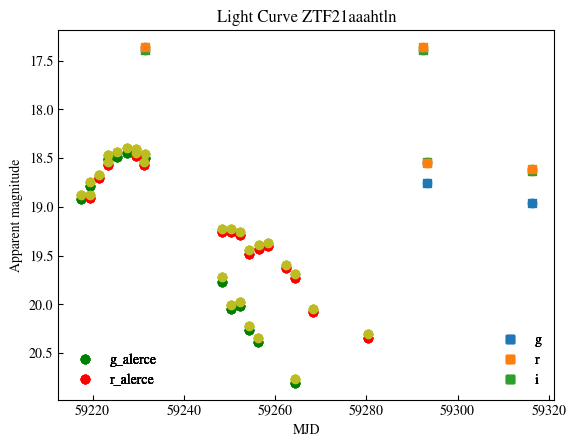

In [42]:
instrument = 'ztf'
if instrument == 'ztf':
    colors = ['C0','C1','C2']
    bands = ['g','r','i']
else:
    colors = ['C0','C1','C2','C3','C4','C5']
    bands = ['u','g','r','i','z','y']

wave = np.array([4746.48, 6366.38])



fig, ax = plt.subplots()
for _, row in spectrum.iterrows():
    for group_name, group in objective_ligtcurve.groupby('fid'):
        color = 'green' if group_name == 1 else 'red'
        extinction_correction = extinction.ccm89(wave, 0.0375, 3.1)[0] if group_name == 1 else extinction.ccm89(wave, 0.0375, 3.1)[1]
        ax.scatter(x=group.mjd, y=group.magpsf, color=color)
        ax.scatter(x=group.mjd, y=group.magpsf - extinction_correction, color='C8')
        
    # This calculate the magnitude of the spectrum based on
    # the integration of the flux
    
    magnitude_integrated = obtain_magnitude_flux(spectrum=row, instrument=instrument)
    for bandapass, magnitude in magnitude_integrated.items():
        ax.scatter(row.mjd,magnitude)
        if instrument == 'ztf':
            color = colors[0] if 'g' in bandapass else colors[1] if 'r' in bandapass else colors[2]
            #label = 
            ax.scatter(row.mjd,magnitude, marker='s',color = color)
        else: 
            color = colors[0] if 'u' in bandapass else colors[1] if 'g' in bandapass else colors[2] if 'r' in bandapass else colors[3] if 'i' in bandapass else colors[4] if 'z' in bandapass else colors[5]
            ax.scatter(row.mjd,magnitude, marker='s',color = color)
    
    handles = [mlines.Line2D([], [], c=color, marker='s',ls='') for color in colors]
    leg1 = ax.legend(handles, bands, loc='lower right',frameon=False)
    ax.add_artist(leg1)
    handles = [mlines.Line2D([], [], c=color, marker='o',ls='') for color in ['g', 'r']]
    leg2 = ax.legend(handles, ['g_alerce', 'r_alerce'], loc='lower left',frameon=False)
    ax.add_artist(leg2)

    ax.yaxis.set_inverted(True)
    ax.set_xlabel('MJD')
    ax.set_ylabel('Apparent magnitude')
    ax.set_title(f'Light Curve {oid}')

In [49]:
spectra_metadata[spectra_metadata['IAU name'] == 'SN 2021gd']

,Obj. ID,IAU name,Internal name/s,Obj. RA,Obj. DEC,Obj. Type,Redshift,Spec. ID,Obs-date,JD,...,Grating,Blaze,Lambda-min,Lambda-max,Del-Lambda,Contrib,Publish,Remarks,Created by,Creation date
8182,17417,SN 2021gd,"PS21cb, ATLAS21ahg, ZTF21aaahtln",157.611196,40.250583,SN Ia,0.076427,59950,2021-01-17 09:38:01.00,2.459232e+06,...,NaN,NaN,3776.7,9223.3,25.451402,NaN,NaN,[TNS source group: 48 - ZTF ],TNS_Bot1,2021-01-19 05:05:04


In [40]:
correction_redshift = spectra_metadata[spectra_metadata['IAU name'] == 'SN 2021gd']['Redshift']
correction_redshift

8182    0.076427
Name: Redshift, dtype: float64

ValueError: the x array must have exactly one dimension.

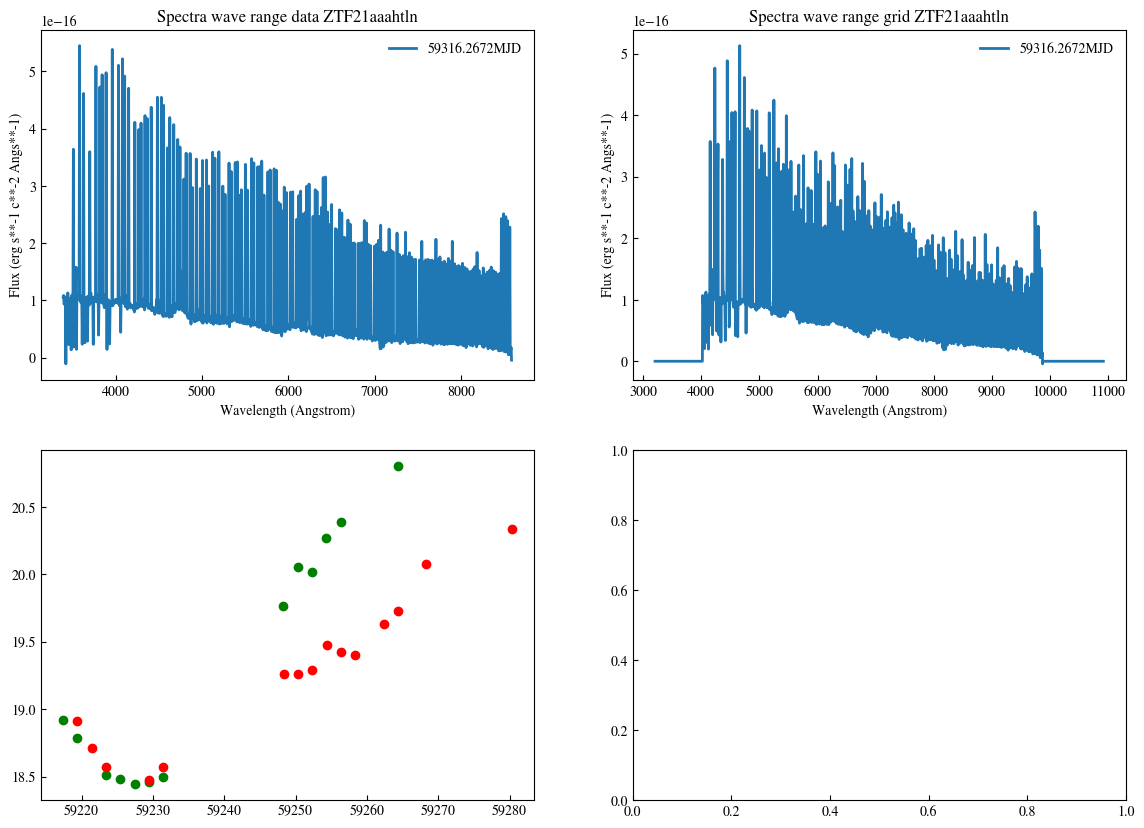

In [46]:
instrument = 'ztf'
if instrument == 'ztf':
    colors = ['C0','C1','C2']
    bands = ['g','r','i']
else:
    colors = ['C0','C1','C2','C3','C4','C5']
    bands = ['u','g','r','i','z','y']

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(nrows=2,ncols=2, figsize=(14, 10))
oid = spectrum.oid.unique()[0]
for _, row in spectrum.iterrows():

    # This calculate the x-axis and y-axis of the spectrum
    x_spectrum = np.linspace(row.lambda_data_min/(1+correction_redshift),row.lambda_data_max/(1+correction_redshift), len(row.flux_lambda))
    y_spectrum = row.flux_lambda

    x_spectrum_grid = np.linspace(row.lambda_grid_min,row.lambda_grid_max, row.nlambda_grid)
    y_spectrum_grid = interpolate_flux(row)

    ax0.plot(x_spectrum, y_spectrum,label=f'{row.mjd:.4f}MJD')
    ax0.set_ylabel('Flux (erg s**-1 c**-2 Angs**-1)')
    ax0.set_xlabel('Wavelength (Angstrom)')
    #ax1.text(x=max(x_spectrum)-500,
    #                 y=max(y_spectrum*2),
    #                 s=f'{row.mjd:.4f}MJD')
    ax0.set_title(f'Spectra wave range data {oid}')
    ax0.legend(frameon=False)

    ax1.plot(x_spectrum_grid, y_spectrum_grid,label=f'{row.mjd:.4f}MJD')
    ax1.set_ylabel('Flux (erg s**-1 c**-2 Angs**-1)')
    ax1.set_xlabel('Wavelength (Angstrom)')
    ax1.set_title(f'Spectra wave range grid {oid}')
    ax1.legend(frameon=False)

    for group_name, group in objective_ligtcurve.groupby('fid'):
        color = 'green' if group_name == 1 else 'red'
        ax2.scatter(x=group.mjd, y=group.magpsf, color=color)
        
    # This calculate the magnitude of the spectrum based on
    # the integration of the flux
    
    magnitude_integrated = obtain_magnitude_flux(spectrum=row, instrument=instrument)
    for bandapass, magnitude in magnitude_integrated.items():
        ax2.scatter(row.mjd,magnitude)
        if instrument == 'ztf':
            color = colors[0] if 'g' in bandapass else colors[1] if 'r' in bandapass else colors[2]
            #label = 
            ax2.scatter(row.mjd,magnitude, marker='s',color = color)
        else: 
            color = colors[0] if 'u' in bandapass else colors[1] if 'g' in bandapass else colors[2] if 'r' in bandapass else colors[3] if 'i' in bandapass else colors[4] if 'z' in bandapass else colors[5]
            ax2.scatter(row.mjd,magnitude, marker='s',color = color)
    
    handles = [mlines.Line2D([], [], c=color, marker='s',ls='') for color in colors]
    leg1 = ax2.legend(handles, bands, loc='lower right',frameon=False)
    ax2.add_artist(leg1)
    handles = [mlines.Line2D([], [], c=color, marker='o',ls='') for color in ['g', 'r']]
    leg2 = ax2.legend(handles, ['g_alerce', 'r_alerce'], loc='lower left',frameon=False)
    ax2.add_artist(leg2)

    ax2.yaxis.set_inverted(True)
    ax2.set_xlabel('MJD')
    ax2.set_ylabel('Apparent magnitude')
    ax2.set_title(f'Light Curve {oid}')

idx_spec = 0
for band, sv in ztf_sv_dict.items():
    color = 'C0' if band == 'g' else 'C1' if band == 'r' else 'C2'
    x, y = zip(*ztf_sv_dict[band])
    x_spectrum = np.linspace(spectrum.iloc[idx_spec].lambda_data_min,spectrum.iloc[idx_spec].lambda_data_max,len(spectrum.iloc[idx_spec].flux_lambda))
    y_spectrum = np.array(spectrum.iloc[idx_spec].flux_lambda)*1e15
    ax3.plot(x_spectrum, y_spectrum, alpha = 0.5, color='gray')
    ax3.plot(x,y,label=f'{band}', color=color)
    ax3.set_xlabel(r'$\lambda$ (Angstrom)')
    ax3.set_yticklabels([])
    ax3.set_yticks([])
    ax3.set_title('Using ZTF Filters')
ax3.legend(frameon=False)
plt.show()

In [61]:
def obtain_lambda_grid(df:pd.Series) -> list[float]:

    lambda_grid = np.logspace(start=np.log10(df.lambda_grid_min),
                stop=np.log10(df.lambda_grid_max),
                num=df.nlambda_grid)

    return lambda_grid

In [62]:
def interpolate_flux(df:pd.Series) -> list[float]:
    
    lambda_grid = obtain_lambda_grid(df)
    
    flux = np.array(df.flux_lambda)
    lambda_data = np.logspace(start=np.log10(df.lambda_data_min),
                stop=np.log10(df.lambda_data_max),
                num=len(flux))

    f = interpolate.interp1d(lambda_data, flux, fill_value=np.nan, bounds_error=False)
    flux_new = f(lambda_grid)

    return flux_new 


In [63]:
def simpler_intergrate(x:list[float],y:list[float]) -> float:
    
    y = np.nan_to_num(y, nan=0.0)
    
    integral = 0
    
    LSUN = const.L_sun

    for i in range(1,len(x)):
        delta_x = x[i] - x[i-1]
        integral += y[i-1] * delta_x

    return integral

In [64]:
def obtain_luminosity_condition(df:pd.Series, instrument:str):

    lambda_grid = obtain_lambda_grid(df)
    flux = interpolate_flux(df)

    luminosity_list = []

    if instrument == 'ztf':
        bandpasses = ['g','r','i']

        for bandpass in bandpasses:
            condition = np.where((wavelength_ztf[bandpass][0] < lambda_grid) & (wavelength_ztf[bandpass][1] > lambda_grid))
            x = lambda_grid[condition]
            y = flux[condition]
            #y = convert_flux2mag(y)
            luminosity = simpler_intergrate(x, y)
            luminosity_list.append(luminosity)

        return dict(zip(bandpasses, luminosity_list))
            

    elif instrument == 'lsst':
        bandpasses = ['u','g','r','i','z','y']

        for bandpass in bandpasses:
            condition = np.where((wavelength_lsst[bandpass][0] < lambda_grid) & (wavelength_lsst[bandpass][1] > lambda_grid))
            x = lambda_grid[condition]
            y = flux[condition]
            #y = convert_flux2mag(y)
            luminosity = simpler_intergrate(x, y)
            luminosity_list.append(luminosity)

        return dict(zip(bandpasses, luminosity_list))

    else:
        return print('There is not that instrument in list')

In [65]:


# Av = 0.0375

Calcualte the magnitud

https://articles.adsabs.harvard.edu/pdf/1996AJ....111.1748F

In [ ]:
def simple_integration(x:list[float],y:list[float],delta_x:list[float]) -> float:
    y = np.nan_to_num(y, nan=0.0)

    if delta_x == None:
        delta_x = x[i] 

    integral = 0
    for i in range(len(delta_x)-1):
        integral += (y[i] + y[i+1]) * delta_x[i] / 2.0
    return integral